In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

data = pd.read_csv('take_home_file.csv')

data

,reservation_id,created,driver_id,owner_id,vehicle_id,driver_age,market_area,delivery_type,make,model,...,guest_insurance_fee,delivery_fee,other_fee,total_fees,gross_revenue,owner_earnings,net_revenue,turo_take_home_rate,countcolumn,age_bucket
0,1603541,1/1/2017,167324,850751,158769,62.0,Market A,Airport Delivery,Nissan,Sentra,...,0.00,0.0,15.45,26.25,134.25,96.00,38.25,28.49%,1,65+
1,1537732,1/1/2017,216764,1906594,217449,39.0,Market A,Airport Delivery,Dodge,Grand Caravan,...,100.89,0.0,9.27,177.42,850.02,513.45,336.57,39.60%,1,36-40
2,1603829,1/1/2017,581695,850751,211771,45.0,Market A,Airport Delivery,Chevrolet,Equinox,...,0.00,0.0,0.00,7.70,84.70,57.75,26.95,31.82%,1,41-45
3,1566375,1/1/2017,585788,1155720,190819,28.0,Market B,Airport Delivery,Mercedes-Benz,C-Class,...,20.25,20.0,0.00,53.75,188.75,116.25,72.50,38.41%,1,26-35
4,1606634,1/1/2017,781705,1387396,175907,23.0,Market A,No Delivery,Chrysler,PT Cruiser,...,3.60,0.0,0.00,10.80,34.80,18.00,16.80,48.28%,1,18-25


In [15]:
# Calculate profit for new customers
new_customer_profit = data[data['first_or_returning_guest'] == 'First Time']['gross_revenue'].sum() - data[data['first_or_returning_guest'] == 'First Time']['owner_earnings'].sum()

# Calculate profit for repeat customers
repeat_customer_profit = data[data['first_or_returning_guest'] == 'Repeat']['gross_revenue'].sum() - data[data['first_or_returning_guest'] == 'Repeat']['owner_earnings'].sum()


In [16]:
print(f"Profit from new customers: ${new_customer_profit:.2f}")
print(f"Profit from repeat customers: ${repeat_customer_profit:.2f}")
print(f"Increase in profit from repeat customers: ${repeat_customer_profit - new_customer_profit:.2f}")

Profit from new customers: $4322381.89
Profit from repeat customers: $4523504.19
Increase in profit from repeat customers: $201122.31


In [12]:
# Average trip length for new and repeat customers
avg_trip_length_new = data[data['first_or_returning_guest'] == 'First Time']['trip_length'].mean()
avg_trip_length_repeat = data[data['first_or_returning_guest'] == 'Repeat']['trip_length'].mean()
print(f"Average trip length for new customers: {avg_trip_length_new:.2f} days")
print(f"Average trip length for repeat customers: {avg_trip_length_repeat:.2f} days")

# Average trip revenue for new and repeat customers
avg_trip_revenue_new = data[data['first_or_returning_guest'] == 'First Time']['trip_revenue'].mean()
avg_trip_revenue_repeat = data[data['first_or_returning_guest'] == 'Repeat']['trip_revenue'].mean()
print(f"Average trip revenue for new customers: ${avg_trip_revenue_new:.2f}")
print(f"Average trip revenue for repeat customers: ${avg_trip_revenue_repeat:.2f}")

Average trip length for new customers: 3.64 days
Average trip length for repeat customers: 4.28 days
Average trip revenue for new customers: $184.98
Average trip revenue for repeat customers: $184.41


In [18]:
data['month_year'] = pd.to_datetime(data['created']).dt.to_period('M')

data

,reservation_id,created,driver_id,owner_id,vehicle_id,driver_age,market_area,delivery_type,make,model,...,delivery_fee,other_fee,total_fees,gross_revenue,owner_earnings,net_revenue,turo_take_home_rate,countcolumn,age_bucket,month_year
0,1603541,1/1/2017,167324,850751,158769,62.0,Market A,Airport Delivery,Nissan,Sentra,...,0.0,15.45,26.25,134.25,96.00,38.25,28.49%,1,65+,2017-01
1,1537732,1/1/2017,216764,1906594,217449,39.0,Market A,Airport Delivery,Dodge,Grand Caravan,...,0.0,9.27,177.42,850.02,513.45,336.57,39.60%,1,36-40,2017-01
2,1603829,1/1/2017,581695,850751,211771,45.0,Market A,Airport Delivery,Chevrolet,Equinox,...,0.0,0.00,7.70,84.70,57.75,26.95,31.82%,1,41-45,2017-01
3,1566375,1/1/2017,585788,1155720,190819,28.0,Market B,Airport Delivery,Mercedes-Benz,C-Class,...,20.0,0.00,53.75,188.75,116.25,72.50,38.41%,1,26-35,2017-01
4,1606634,1/1/2017,781705,1387396,175907,23.0,Market A,No Delivery,Chrysler,PT Cruiser,...,0.0,0.00,10.80,34.80,18.00,16.80,48.28%,1,18-25,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87664,4024828,12/31/2018,8918352,3952673,481390,28.0,Market A,No Delivery,Ford,Mustang,...,0.0,0.00,35.43,84.43,36.75,47.68,56.47%,1,26-35,2018-12
87665,4024449,12/31/2018,8918657,3952673,481264,23.0,Market A,No Delivery,Ford,Mustang,...,0.0,5.00,41.28,86.28,38.25,48.03,55.67%,1,18-25,2018-12
87666,4027078,12/31/2018,8919595,2443012,301939,22.0,Market A,No Delivery,Chevrolet,Corvette,...,0.0,0.00,82.10,203.10,90.75,112.35,55.32%,1,18-25,2018-12
87667,4025266,12/31/2018,8920084,878824,125682,43.0,Market B,No Delivery,Honda,CR-V,...,0.0,0.00,23.95,62.95,29.25,33.70,53.53%,1,41-45,2018-12


In [23]:
#create monthly profit for new and repeat customers

monthly_profit = data.groupby(['month_year', 'first_or_returning_guest', 'market_area'])[['gross_revenue', 'owner_earnings']].sum().reset_index()
monthly_profit['profit'] = monthly_profit['gross_revenue'] - monthly_profit['owner_earnings']

monthly_profit

,month_year,first_or_returning_guest,market_area,gross_revenue,owner_earnings,profit
0,2017-01,First Time,Market A,87106.100,53251.2225,33854.8775
1,2017-01,First Time,Market B,77939.720,48551.8690,29387.8510
2,2017-01,Repeat,Market A,66174.710,39640.4025,26534.3075
3,2017-01,Repeat,Market B,129198.570,84718.5975,44479.9725
4,2017-02,First Time,Market A,81145.600,50304.5340,30841.0660
...,...,...,...,...,...,...
91,2018-11,Repeat,Market B,467640.850,276892.3945,190748.4555
92,2018-12,First Time,Market A,326971.080,191036.2940,135934.7860
93,2018-12,First Time,Market B,216880.800,126106.0305,90774.7695
94,2018-12,Repeat,Market A,294327.317,178063.7565,116263.5605


In [27]:
#manipulate data 

monthly_profit_wide = monthly_profit.pivot_table(index=['month_year', 'market_area'], columns='first_or_returning_guest', values='profit', aggfunc='sum').reset_index()
monthly_profit_wide = monthly_profit_wide.rename_axis(None, axis=1).sort_values(['market_area', 'month_year'])

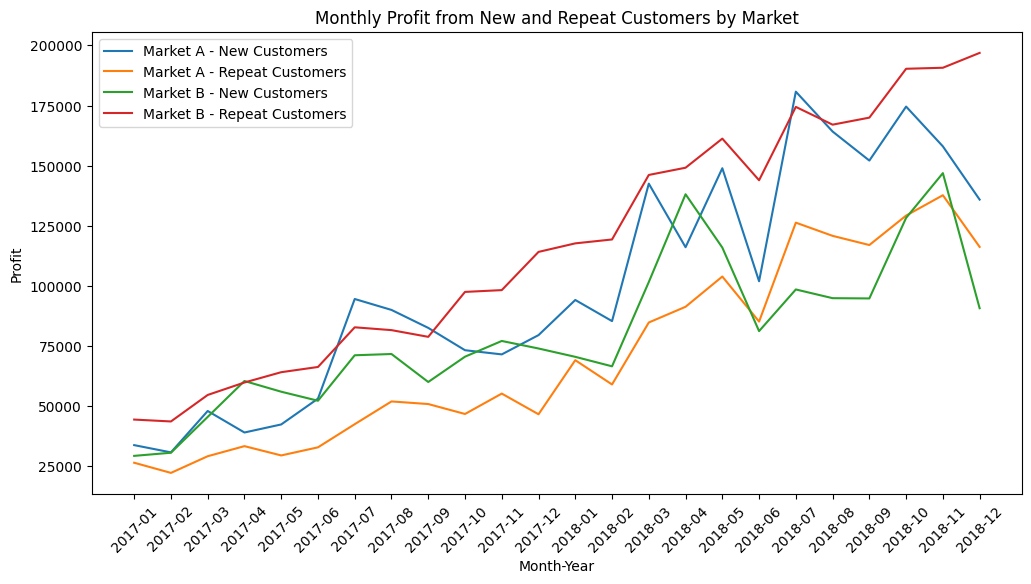

In [31]:
#Viz


fig, ax = plt.subplots(figsize=(12, 6))
for market in monthly_profit_wide['market_area'].unique():
    market_data = monthly_profit_wide[monthly_profit_wide['market_area'] == market]
    ax.plot(market_data['month_year'].astype(str), market_data['First Time'], label=f"{market} - New Customers")
    ax.plot(market_data['month_year'].astype(str), market_data['Repeat'], label=f"{market} - Repeat Customers")

ax.set_xlabel('Month-Year')
ax.set_ylabel('Profit')
ax.set_title('Monthly Profit from New and Repeat Customers by Market')
ax.legend()
plt.xticks(rotation=45)
plt.show()